In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [2]:
# Create our data.

X_train = np.array([[0, 0],  # Class 1.
                   [0, 10],  # Class 2.
                   [10, 10], # Class 3.
                   [10, 0],  # Class 4.
                   [0, 1],   # etc. basically in corners.
                   [1, 1],
                   [0.5, 0.9],
                   [3.1, 3.7],
                   [3, 2],
                   [1, 7],
                   [2, 9],
                   [2.5, 8.6],
                   [3.5, 7.9],
                   [9, 9],
                   [8, 9],
                   [8.5, 8.5],
                   [7.9, 9.3],
                   [9, 1],
                   [8.5, 2],
                   [7.9, 3],
                   [7.5, 1.9],
                   [1.5, 0.4],
                   [0.3, 9.5], 
                   [9.9, 8.9],
                   [9.3, 0.7],
                   [0.1, 1.9],
                   [2.2, 1.9],
                   [0.6, 0.2],
                   [3.3, 3.9],
                   [3.5, 2.1],
                   [1.9, 7.9],
                   [2.3, 9.7],
                   [2.1, 8.2],
                   [4.5, 8.1],
                   [9.1, 9.3],
                   [7.8, 8.8],
                   [8.1, 8.1],
                   [8.5, 7.9],
                   [8.6, 1.3],
                   [8.1, 2.1],
                   [8.0, 3.4],
                   [7.8, 2.0],
                   [6.0, 3.0],
                   [7.0, 6.0],
                   [8.0, 6.5],
                   [5.0, 6.0],
                   [7.0, 4.2],
                   [4.1, 5.0],
                   [5.0, 3.0],
                   [6.0, 4.2],
                   [5.0, 4.0],
                   [6.0, 4.8],
                   [6.2, 6.1],
                   [1.8, 3.0], #
                   [0.3, 4.0],
                   [2.1, 4.8],
                   [2.0, 6.0],
                   [5.0, 9.0],
                   [6.1, 8.0],
                   [7.2, 9.1],
                   [6.2, 7.8], #
                   [3.0, 0.5],
                   [2.2, 0.2],
                   [5.0, 2.0],
                   [7.0, 1.0],
                   [4.5, 1.0],
                   [4.0, 1.0],
                   [8.0, 1.5],
                   [6.0, 1.0],
                   [4.5, 0.0],
                   [9.0, 4.1],
                   [9.8, 6.1],
                   [8.5, 5.0]]) 

y_train = np.array([0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
                   0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   1, 1, 1, 1, 1, 1, 1, 1,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [3]:
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

shape of X_train: (73, 2), shape of y_train: (73,)


In [4]:
# Combine X_train and y_train into a single array.
combined = np.column_stack((X_train, y_train))

# Specified seed should make each training similar aka stable, because shuffle will always shuffle the same,
# training should also start with same random weights and biases.
np.random.seed(42)

# Shuffle the combined array.
np.random.shuffle(combined)

# Separate the shuffled array back into X_train and y_train.
shuffled_X_train = combined[:, :-1]
shuffled_y_train = combined[:, -1]

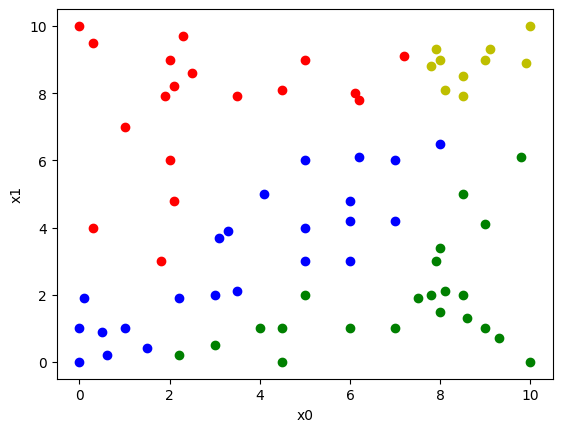

In [5]:
# Plot all the data.

class0 = shuffled_X_train[shuffled_y_train == 0]
class1 = shuffled_X_train[shuffled_y_train == 1]
class2 = shuffled_X_train[shuffled_y_train == 2]
class3 = shuffled_X_train[shuffled_y_train == 3]

plt.scatter(class0[:, 0], class0[:, 1], c='b', marker='o')
plt.scatter(class1[:, 0], class1[:, 1], c='r', marker='o')
plt.scatter(class2[:, 0], class2[:, 1], c='y', marker='o')
plt.scatter(class3[:, 0], class3[:, 1], c='g', marker='o')

plt.xlabel('x0')
plt.ylabel('x1')

plt.show()

In [6]:
# Split the shuffled dataset into three sets with a 60/20/20 ratio.
train_size = int(0.6 * len(shuffled_X_train))
val_size = int(0.2 * len(shuffled_X_train))

X_train_split, X_val_split, X_test_split = np.split(shuffled_X_train, [train_size, train_size+val_size])
y_train_split, y_val_split, y_test_split = np.split(shuffled_y_train, [train_size, train_size+val_size])

scaler = StandardScaler()

X_train_split_scaled = scaler.fit_transform(X_train_split)
X_val_split_scaled = scaler.transform(X_val_split)
X_test_split_scaled = scaler.transform(X_test_split)

# Verify the sizes of the splits.
print("Size of X_train_split:", len(X_train_split))
print("Size of X_val_split:", len(X_val_split))
print("Size of X_test_split:", len(X_test_split))
print("Size of y_train_split:", len(y_train_split))
print("Size of y_val_split:", len(y_val_split))
print("Size of y_test_split:", len(y_test_split))

Size of X_train_split: 43
Size of X_val_split: 14
Size of X_test_split: 16
Size of y_train_split: 43
Size of y_val_split: 14
Size of y_test_split: 16


In [7]:
# Construct a bunch of neural networks to test all of them on the cross validation set.

regularization_lamba = 0.08

model0 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'linear')
    ]
)

model1 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'linear')
    ]
)

model2 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'linear')
    ]
)

model3 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'linear')
    ]
)

model4 = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(regularization_lamba)),
        Dense(4, activation = 'linear')
    ]
)

models = []
models.append(model0)
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)

In [8]:
# Specify loss function for all the models.
# For multiclasss classification we use 'SparseCategoricalCrossentropy'.
# Instead of regression algorithm we specify 'Adam' algorithm which can modify learning late alpha on the go.

for i in range(len(models)):
    models[i].compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

In [9]:
# Train all models.

cross_eval_losses = np.zeros(len(models))

for i in range(len(models)):
    print(f'Training {i}...')
    
    models[i].fit(
    X_train_split_scaled, y_train_split,
    epochs=800,
    verbose=0
)
    
    # Evaluate and print the training cost & cross evaluation cost..
    train_loss = models[i].evaluate(X_train_split_scaled, y_train_split, verbose=0)
    cross_eval_losses[i] = models[i].evaluate(X_val_split_scaled, y_val_split, verbose=0)
    print(f'Training {i} cost: {train_loss}')
    print(f'Training {i} cross cost: {cross_eval_losses[i]}')

Training 0...
Training 0 cost: 0.2454451620578766
Training 0 cross cost: 0.346268892288208
Training 1...
Training 1 cost: 0.4412597715854645
Training 1 cross cost: 0.45258936285972595
Training 2...
Training 2 cost: 0.4531395137310028
Training 2 cross cost: 0.5787711143493652
Training 3...
Training 3 cost: 0.368373304605484
Training 3 cross cost: 0.4866906702518463
Training 4...
Training 4 cost: 0.5906182527542114
Training 4 cross cost: 0.5627110004425049


In [10]:
# Pick the best model from cross evaluation and test it on test data.
cross_eval_best_index = np.argmin(cross_eval_losses)

train_test_loss = models[cross_eval_best_index].evaluate(X_test_split_scaled, y_test_split, verbose=0)
print(f'Test cost for model {cross_eval_best_index}: {train_test_loss}')

Test cost for model 0: 0.13826122879981995


450/450 [==============================] - 0s 304us/step


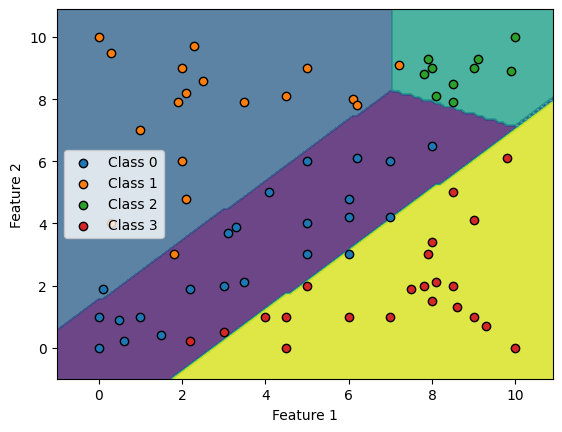

In [11]:
# Plot decision boundaries.

# Create meshgrid.

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the meshgrid.

grid_points = np.c_[xx.ravel(), yy.ravel()]

grid_points_scaled = scaler.transform(grid_points)

grid_predictions = models[cross_eval_best_index].predict(grid_points_scaled)
grid_predictions_mostProbableClass = np.argmax(grid_predictions, axis=1)

# Reshape to fit the meshgrid.

grid_predictions = grid_predictions_mostProbableClass.reshape(xx.shape)

# Contour plot.

plt.contourf(xx, yy, grid_predictions, alpha=0.8)

# Scatter plot.

unique_classes = np.unique(y_train)
for i, cls in enumerate(unique_classes):
    plt.scatter(X_train[y_train == cls, 0], X_train[y_train == cls, 1], label=f'Class {cls}', edgecolors='black')
    
# Add lables.
    
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Draw.

plt.show()

In [12]:
# Decision boundaries seem pretty good each time I train my models.